In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from itertools import combinations
from collections import Counter
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path1 = '/content/drive/MyDrive/sales_data_january_2019.csv'
df1 = pd.read_csv(file_path1)
df1.head()

file_path2 = '/content/drive/MyDrive/sales_data_february_2019.csv'
df2 = pd.read_csv(file_path2)
df2.head()

file_path3 = '/content/drive/MyDrive/sales_data_march_2019.csv'
df3 = pd.read_csv(file_path3)
df3.head()

file_path4 = '/content/drive/MyDrive/sales_data_april_2019.csv'
df4 = pd.read_csv(file_path4)
df4.head()

file_path5 = '/content/drive/MyDrive/sales_data_may_2019.csv'
df5 = pd.read_csv(file_path5)
df5.head()

file_path6 = '/content/drive/MyDrive/sales_data_june_2019.csv'
df6 = pd.read_csv(file_path6)
df6.head()

file_path7 = '/content/drive/MyDrive/sales_data_july_2019.csv'
df7 = pd.read_csv(file_path7)
df7.head()

file_path8 = '/content/drive/MyDrive/sales_data_august_2019.csv'
df8 = pd.read_csv(file_path8)
df8.head()

file_path9 = '/content/drive/MyDrive/sales_data_september_2019.csv'
df9 = pd.read_csv(file_path9)
df9.head()

file_path10 = '/content/drive/MyDrive/sales_data_october_2019.csv'
df10 = pd.read_csv(file_path10)
df10.head()

file_path11 = '/content/drive/MyDrive/sales_data_november_2019.csv'
df11 = pd.read_csv(file_path11)
df11.head()

file_path12 = '/content/drive/MyDrive/sales_data_december_2019.csv'
df12 = pd.read_csv(file_path12)
df12.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# Data Preprocessing

## Data Cleanign + Simple Feature engineering

# EDA

In [8]:
# Hapus baris kosong
df = df.dropna()

# Konversi kolom numerik
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Hitung total penjualan per baris
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Hapus baris dengan tanggal tidak valid
df = df.dropna(subset=['Order Date'])

# Tambahkan kolom bulan dan tahun
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [10]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Tampilkan hasilnya
print(monthly_sales)

    Year  Month       Sales
0   2019      1  1813586.44
1   2019      2  2202022.42
2   2019      3  2807100.38
3   2019      4  3390670.24
4   2019      5  3152606.75
5   2019      6  2577802.26
6   2019      7  2647775.76
7   2019      8  2244467.88
8   2019      9  2097560.13
9   2019     10  3736726.88
10  2019     11  3199603.20
11  2019     12  4613443.34
12  2020      1     8670.29


In [11]:
df.duplicated().sum()

np.int64(264)

In [12]:
df.drop_duplicates(inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,2019
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,2019
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,2019
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,2019
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,2019
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,2019
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,2019
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,2019
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,2019


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Sales               0
Month               0
Year                0
dtype: int64


In [15]:
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Sales,0
Month,0
Year,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Sales             185686 non-null  float64       
 7   Month             185686 non-null  int32         
 8   Year              185686 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(3)
memory usage: 12.8+ MB


In [17]:
df['Sales'].describe()

,Sales
count,185686.000000
mean,185.611936
std,333.032118
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,3400.000000


In [18]:
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,float64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object
Sales,float64
Month,int32
Year,int32


In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df['Hour'] = df['Order Date'].dt.hour

In [21]:
# Mengekstrak nama kota

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [22]:
df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Sales,0
Month,0
Year,0
Hour,0


In [23]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour,City
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,2019,21,Boston
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,2019,14,Portland
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,2019,13,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,2019,20,Los Angeles
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,2019,11,Austin


In [24]:
# Mengeluarkan tahun 2020

df = df[df['Order Date'].dt.date != pd.to_datetime('2020-01-01').date()]

## Metrik Marketing

In [25]:
# Hitung sales revenue
sales_revenue = df['Sales'].sum()

# Hitung jumlah order unik
jumlah_order = df['Order ID'].nunique()

# Hitung sales barang yang terjual
jumlah_barang = df['Quantity Ordered'].sum()

# Rata-rata barang per transaksi
rata2_barang_per_order = jumlah_barang / jumlah_order

# Rata-rata spending per transaksi
rata2_spending_per_order = sales_revenue / jumlah_order

# Cetak hasil
print(f'Sales Revenue: ${sales_revenue:,.2f}')
print(f'Jumlah Order: {jumlah_order}')
print(f'Jumlah Barang Terjual: {jumlah_barang}')
print(f'Rata-rata Barang per Transaksi: {rata2_barang_per_order:.2f}')
print(f'Rata-rata Spending per Transaksi: ${rata2_spending_per_order:.2f}')

Sales Revenue: $34,456,867.65
Jumlah Order: 178406
Jumlah Barang Terjual: 208771.0
Rata-rata Barang per Transaksi: 1.17
Rata-rata Spending per Transaksi: $193.14


## Total order dan GMV

### Daily

In [26]:
daily_stats = df.groupby(df['Order Date'].dt.date).agg({
    'Order ID': pd.Series.nunique,
    'Sales': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Sales': 'Total GMV'})

# Tampilkan hasil
print("Statistik Harian:")
display(daily_stats.head())

Statistik Harian:


,Jumlah Order,Total GMV
Order Date,,
2019-01-01,287,65681.94
2019-01-02,308,70663.20
2019-01-03,286,47046.20
2019-01-04,282,62000.22
2019-01-05,301,46524.63


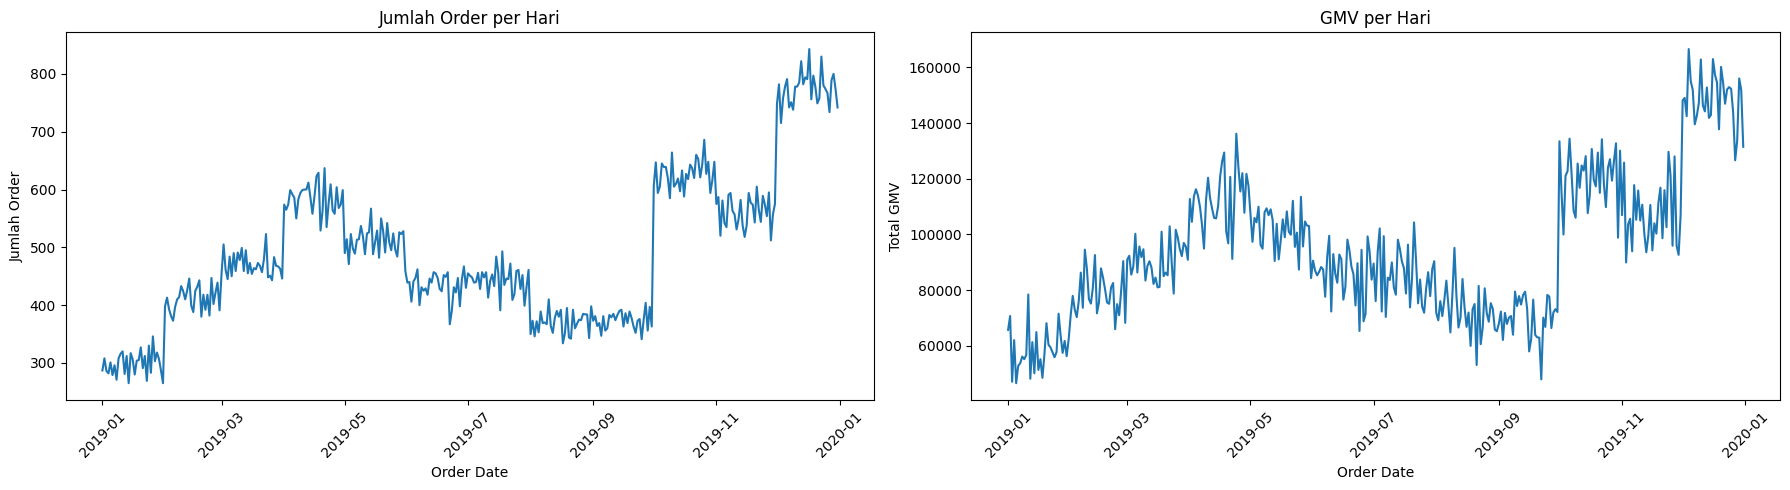

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=daily_stats, x=daily_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Hari')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=daily_stats, x=daily_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Hari')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Weekly

In [28]:
df['Week'] = df['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_stats = df.groupby('Week').agg({
    'Order ID': pd.Series.nunique,
    'Sales': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Sales': 'Total GMV'})

print("\nStatistik Mingguan:")
display(weekly_stats.head())


Statistik Mingguan:


,Jumlah Order,Total GMV
Week,,
2018-12-31,1743,344678.73
2019-01-07,2104,409389.43
2019-01-14,2104,394921.11
2019-01-21,2134,426020.17
2019-01-28,2381,459570.62


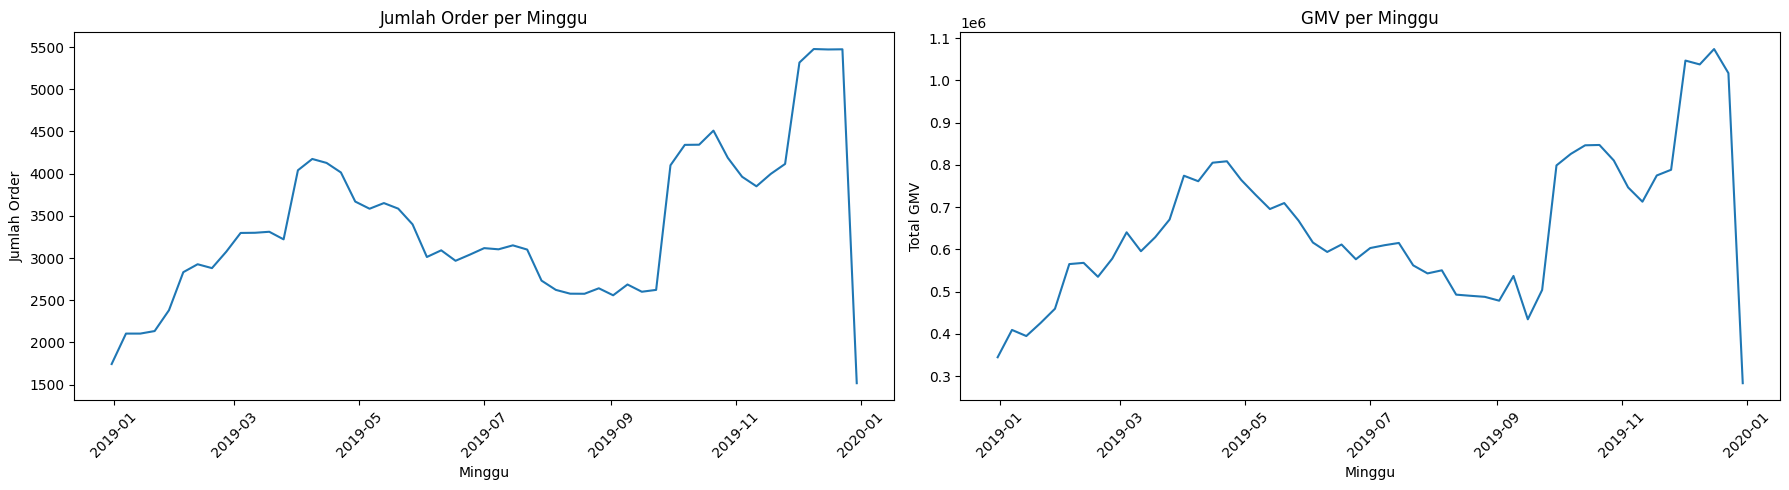

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=weekly_stats, x=weekly_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Minggu')
axs[0].set_xlabel('Minggu')
axs[0].set_ylabel('Jumlah Order')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=weekly_stats, x=weekly_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Minggu')
axs[1].set_xlabel('Minggu')
axs[1].set_ylabel('Total GMV')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Monthly

In [30]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_stats = df.groupby('Month').agg({
    'Order ID': pd.Series.nunique,
    'Sales': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Sales': 'Total GMV'})

print("\nStatistik Bulanan:")
display(monthly_stats)


Statistik Bulanan:


,Jumlah Order,Total GMV
Month,,
2019-01,9262,1812742.87
2019-02,11496,2200078.08
2019-03,14549,2804973.35
2019-04,17528,3389217.98
2019-05,15836,3150616.23
2019-06,12989,2576280.15
2019-07,13761,2646461.32
2019-08,11484,2241083.37
2019-09,11202,2094465.69


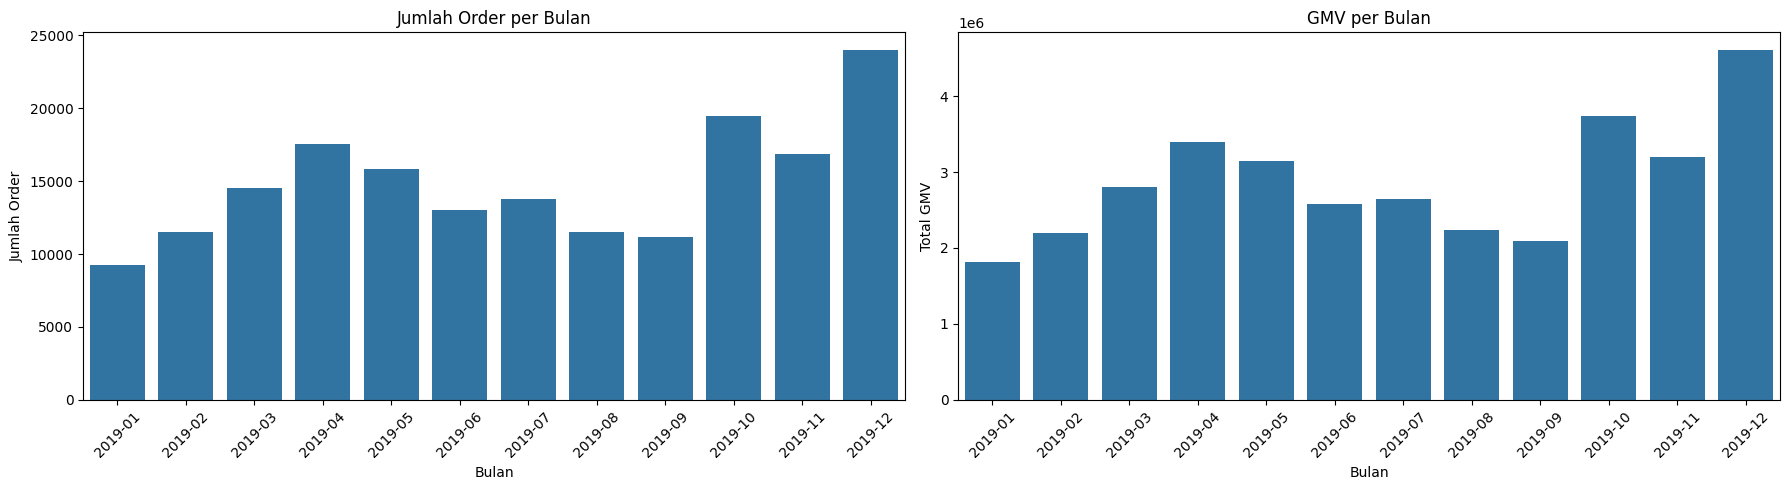

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(data=monthly_stats, x=monthly_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Bulan')
axs[0].set_xlabel('Bulan')
axs[0].set_ylabel('Jumlah Order')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=monthly_stats, x=monthly_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Bulan')
axs[1].set_xlabel('Bulan')
axs[1].set_ylabel('Total GMV')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Top 10 Prdouk

### 3 Bulan Terakhir

In [32]:
# Ambil tanggal paling akhir dari dataset
last_order_date = df['Order Date'].max()

# Hitung batas awal untuk rentang 3 bulan terakhir
start_date_3_months = last_order_date - pd.DateOffset(months=3)

# Filter data hanya untuk 3 bulan terakhir
df_last_3_months = df[df['Order Date'] >= start_date_3_months]

In [33]:
df_last_3_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour,City,Week
111830,248643,Lightning Charging Cable,1.0,14.95,2019-10-01 01:36:00,"321 Chestnut St, Austin, TX 73301",14.95,2019-10,2019,1,Austin,2019-09-30
113386,250139,Google Phone,1.0,600.00,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",600.00,2019-10,2019,0,San Francisco,2019-09-30
113387,250139,USB-C Charging Cable,1.0,11.95,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",11.95,2019-10,2019,0,San Francisco,2019-09-30
113528,250275,ThinkPad Laptop,1.0,999.99,2019-10-01 00:46:00,"814 7th St, San Francisco, CA 94016",999.99,2019-10,2019,0,San Francisco,2019-09-30
113951,250684,AAA Batteries (4-pack),1.0,2.99,2019-10-01 03:38:00,"985 Pine St, San Francisco, CA 94016",2.99,2019-10,2019,3,San Francisco,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,2019-12,2019,20,San Francisco,2019-12-09
185682,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,2019-12,2019,12,Los Angeles,2019-11-25
185683,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,2019-12,2019,6,Seattle,2019-12-09
185684,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,2019-12,2019,10,Dallas,2019-12-02


### Top 10 Produk

10 Produk Teratas Berdasarkan Total Revenue (3 Bulan Terakhir):


,Sales
Product,
Macbook Pro Laptop,2735300.00
iPhone,1601600.00
ThinkPad Laptop,1371986.28
Google Phone,1082400.00
27in 4K Gaming Monitor,841988.41
Apple Airpods Headphones,787950.00
34in Ultrawide Monitor,786579.30
Flatscreen TV,493800.00
Bose SoundSport Headphones,453054.69


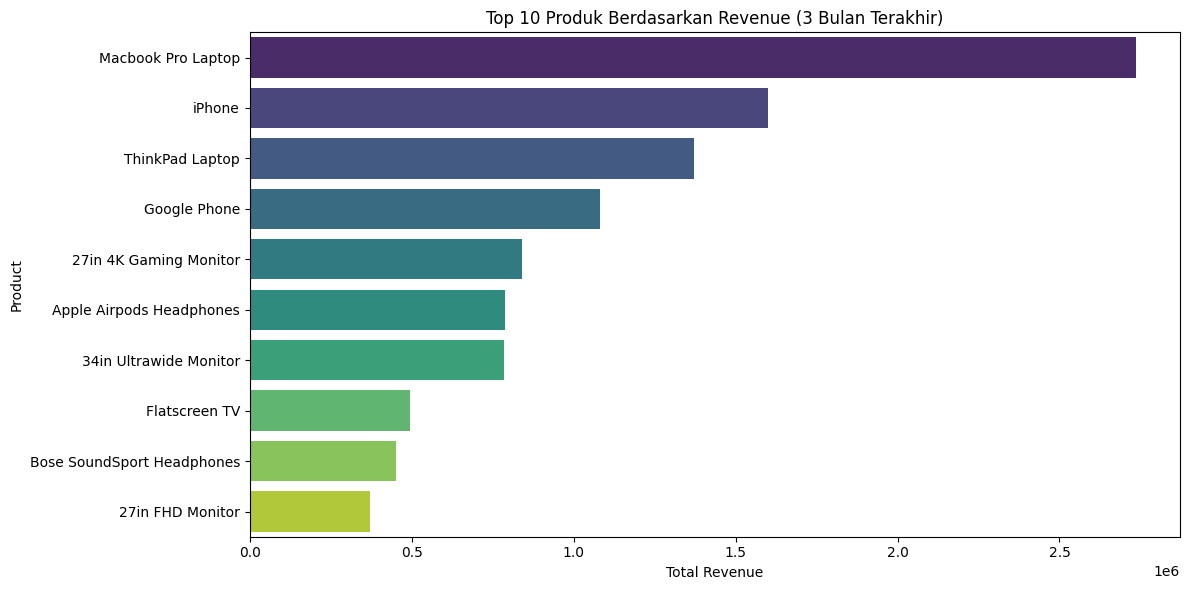

In [34]:
# Hitung total pendapatan untuk setiap produk dalam 3 bulan terakhir
revenue_per_product = df_last_3_months.groupby('Product')['Sales'].sum()

# Ambil 10 produk teratas berdasarkan total pendapatan tertinggi
top_10_products_by_revenue = revenue_per_product.sort_values(ascending=False).head(10)

# Tampilkan hasil
print("10 Produk Teratas Berdasarkan Total Revenue (3 Bulan Terakhir):")
display(top_10_products_by_revenue)

# Visualisasi produk-produk dengan revenue tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products_by_revenue.values, y=top_10_products_by_revenue.index, palette='viridis')
plt.title('Top 10 Produk Berdasarkan Revenue (3 Bulan Terakhir)')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### Analisa Produk yang di beli bersamaan (bundling)

In [35]:
# Identifikasi order yang memiliki lebih dari 1 produk
order_size = df_last_3_months.groupby('Order ID').size()
orders_with_multiple_items = order_size[order_size > 1].index

# Filter hanya transaksi dengan lebih dari satu produk dalam satu order
orders_for_bundle_analysis = df_last_3_months[df_last_3_months['Order ID'].isin(orders_with_multiple_items)]

# Buat daftar untuk menyimpan kombinasi produk
product_combinations = []

# Untuk setiap order, ambil kombinasi produk yang dibeli bersama
for order_id, order_group in orders_for_bundle_analysis.groupby('Order ID'):
    products_in_order = order_group['Product'].unique()
    if len(products_in_order) > 1:
        combos = combinations(sorted(products_in_order), 2)
        product_combinations.extend(combos)

# Hitung frekuensi kemunculan masing-masing kombinasi
top_product_combinations = Counter(product_combinations).most_common(10)

# Tampilkan hasil kombinasi terbanyak (calon bundling)
print("\n📦 10 Kombinasi Produk yang Paling Sering Dibeli Bersamaan (Calon Bundling):\n")
print(f"{'No.':<5} {'Produk A':<40} {'Produk B':<40} {'Jumlah Dibeli Bersama':>20}")
print("-" * 110)

for i, (combo, count) in enumerate(top_product_combinations, start=1):
    print(f"{i:<5} {combo[0]:<40} {combo[1]:<40} {count:>20}")


📦 10 Kombinasi Produk yang Paling Sering Dibeli Bersamaan (Calon Bundling):

No.   Produk A                                 Produk B                                 Jumlah Dibeli Bersama
--------------------------------------------------------------------------------------------------------------
1     Google Phone                             USB-C Charging Cable                                      314
2     Lightning Charging Cable                 iPhone                                                    307
3     Wired Headphones                         iPhone                                                    163
4     Google Phone                             Wired Headphones                                          155
5     Apple Airpods Headphones                 iPhone                                                    133
6     USB-C Charging Cable                     Vareebadd Phone                                           130
7     Bose SoundSport Headphones               

## Rush Hour

In [36]:
# Mengelompokkan data berdasarkan jam, lalu menghitung jumlah order unik dan total revenue
rush_hour_stats = df.groupby('Hour').agg({
    'Order ID': pd.Series.nunique,   # menghitung jumlah order unik per jam
    'Sales': 'sum'                   # menjumlahkan total revenue per jam
}).rename(columns={
    'Order ID': 'Jumlah Order',
    'Sales': 'Total Revenue'
}).reset_index()

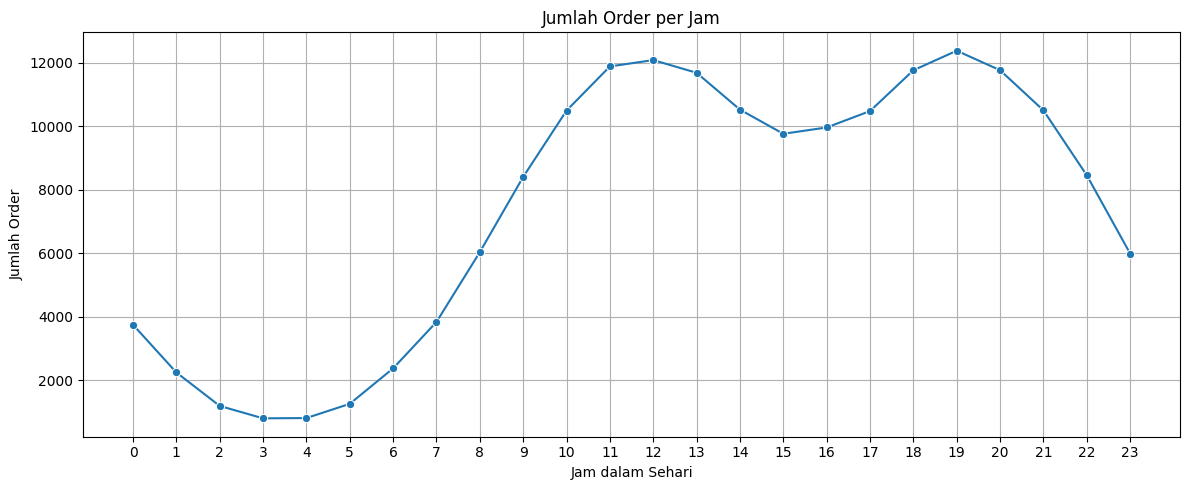

In [37]:
# Visualisasi jumlah order tiap jam
plt.figure(figsize=(12, 5))
sns.lineplot(
    x='Hour',
    y='Jumlah Order',
    data=rush_hour_stats,
    marker='o'
)
plt.title('Jumlah Order per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Order')
plt.xticks(range(0, 24))  # Tampilkan semua jam dari 0 sampai 23
plt.grid(True)
plt.tight_layout()
plt.show()

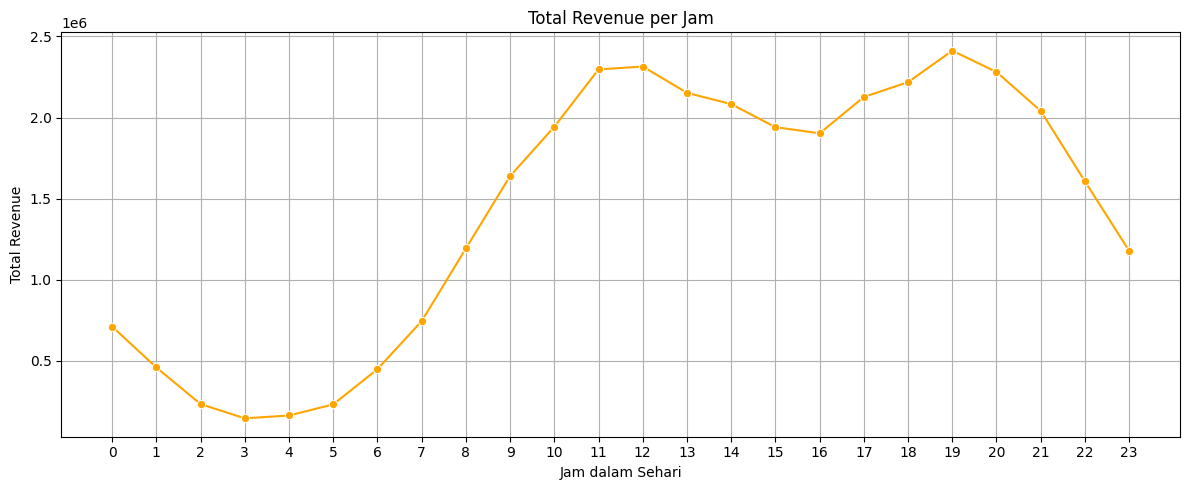

In [38]:
# Visualisasi total revenue tiap jam
plt.figure(figsize=(12, 5))
sns.lineplot(
    x='Hour',
    y='Total Revenue',
    data=rush_hour_stats,
    marker='o',
    color='orange'  # Warna dibedakan agar tidak membingungkan dengan plot sebelumnya
)
plt.title('Total Revenue per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))  # Tampilkan semua jam dari 0 sampai 23
plt.grid(True)
plt.tight_layout()
plt.show()

# EDA (Time Series Deep Dive Analytics)

In [39]:
df.set_index('Order Date', inplace=True)

In [40]:
# Agregasi total penjualan per hari
df_daily = df.resample('D').agg({
    'Order ID': pd.Series.nunique,  # Jumlah order unik per hari
}).rename(columns={
    'Order ID': 'total_orders',
    'Sales': 'Revenue'
})

In [41]:
df_daily

,total_orders
Order Date,
2019-01-01,287
2019-01-02,308
2019-01-03,286
2019-01-04,282
2019-01-05,301
...,...
2019-12-27,734
2019-12-28,789
2019-12-29,800


## Visualisasi Time Series

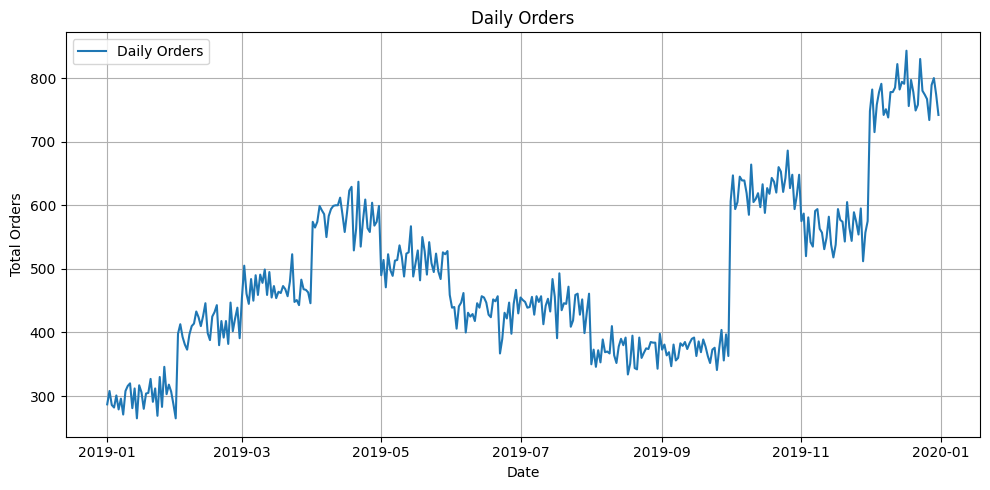

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df_daily, label='Daily Orders')
plt.title('Daily Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

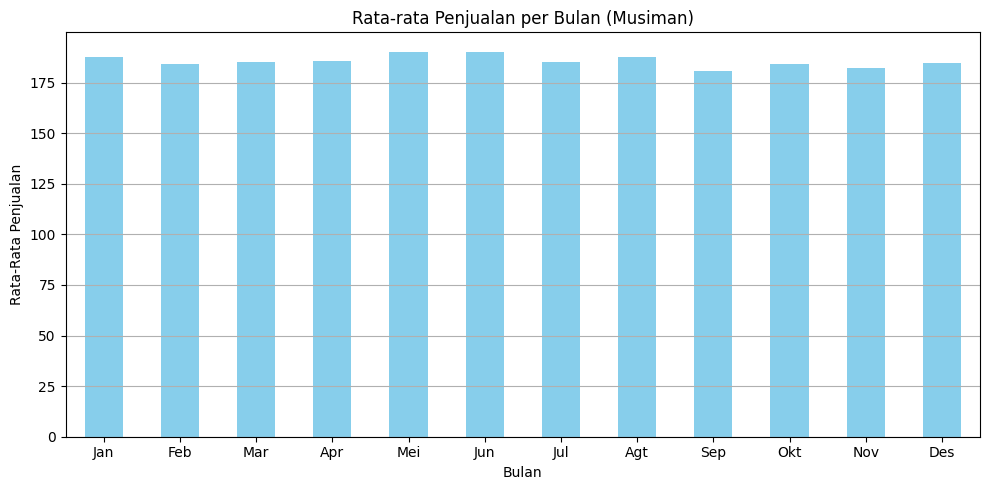

In [43]:
# Tambahkan kolom 'Month' dari index datetime
df['Month'] = df.index.month

# Hitung rata-rata penjualan per bulan
monthly_avg = df.groupby('Month')['Sales'].mean()

# Visualisasi pola musiman bulanan
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penjualan per Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Penjualan')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',
    'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'
], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

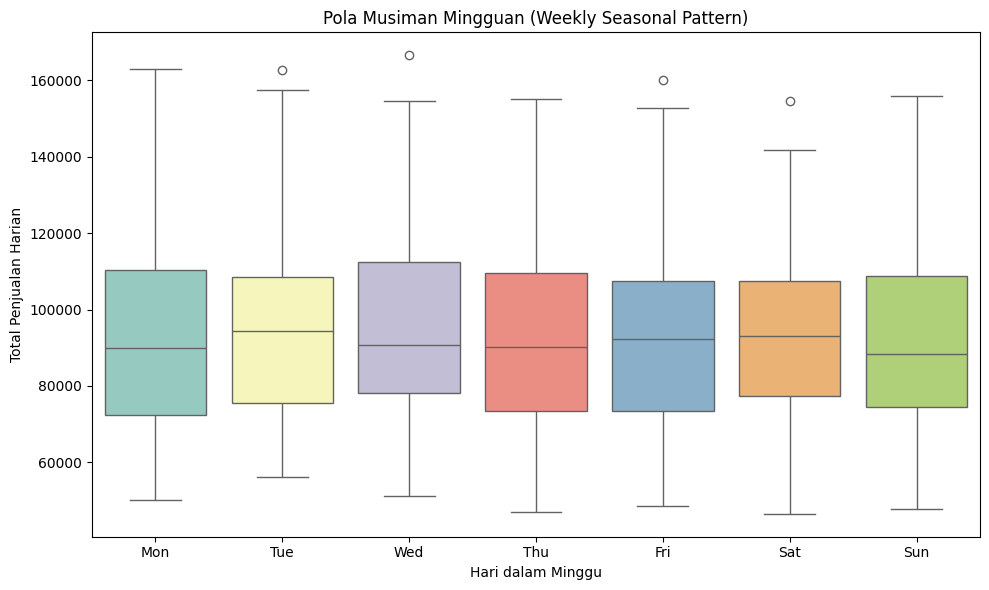

In [44]:
df.index = pd.to_datetime(df.index)  # pastikan index berupa datetime

# Agregasi penjualan harian
df_weekly_plot = df.groupby(df.index.date)['Sales'].sum().reset_index()
df_weekly_plot['Order Date'] = pd.to_datetime(df_weekly_plot['index'])  # beri nama ulang
df_weekly_plot.drop(columns='index', inplace=True)

# Tambahkan kolom hari dalam minggu (0 = Senin, 6 = Minggu)
df_weekly_plot['DayOfWeek'] = df_weekly_plot['Order Date'].dt.dayofweek

# Visualisasi boxplot pola mingguan
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=df_weekly_plot, palette='Set3')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Total Penjualan Harian')
plt.title('Pola Musiman Mingguan (Weekly Seasonal Pattern)')
plt.tight_layout()
plt.show()

Hari Selasa memiliki median penjualan harian tertinggi, menandakan konsistensi penjualan yang kuat di hari tersebut. Sementara itu, hari Rabu menunjukkan variasi penjualan yang lebih besar dan beberapa lonjakan ekstrem (outlier), yang mengindikasikan peluang promosi pada hari-hari tertentu. Secara umum, tren mingguan cukup merata, namun Selasa dan Rabu berpotensi menjadi hari yang strategis untuk optimalisasi penjualan.

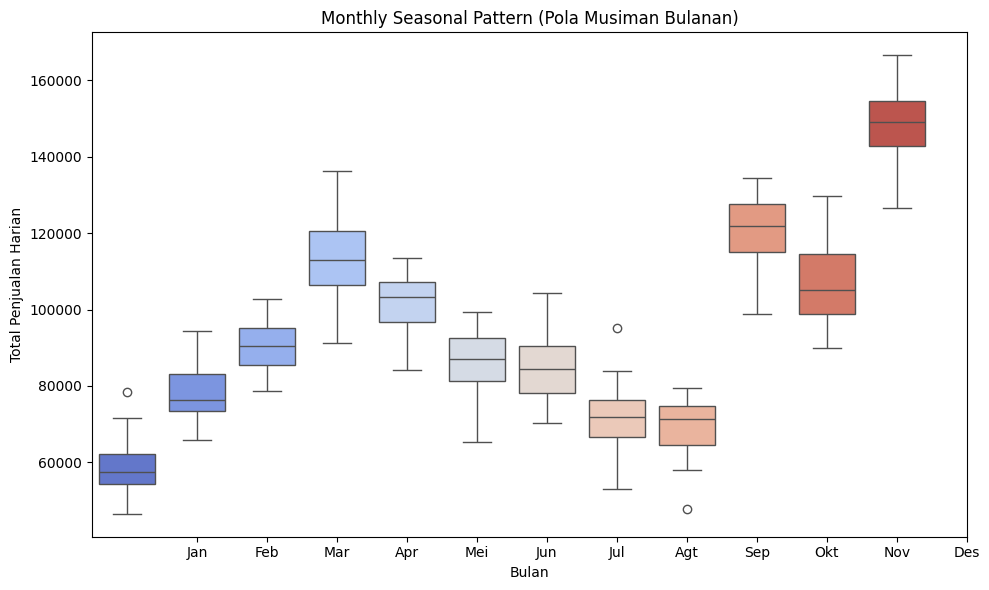

In [45]:
df_monthly_plot = (
    df['Sales']
    .resample('D')
    .sum()
    .reset_index(name='Daily Sales')
)

# Ambil nilai bulan
df_monthly_plot['Month'] = df_monthly_plot['Order Date'].dt.month

# Visualisasi boxplot musiman bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Daily Sales', data=df_monthly_plot, palette='coolwarm')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']
)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan Harian')
plt.title('Monthly Seasonal Pattern (Pola Musiman Bulanan)')
plt.tight_layout()
plt.show()

Penjualan tertinggi berada di akhir tahun yang menandakan pada akhir tahun mungkin banyak promo yang membuat orang ingin ber belanja, dan juga untuk beberapa orang sudah mendapatkan bonus tahunan.

## Time Series Decomposition

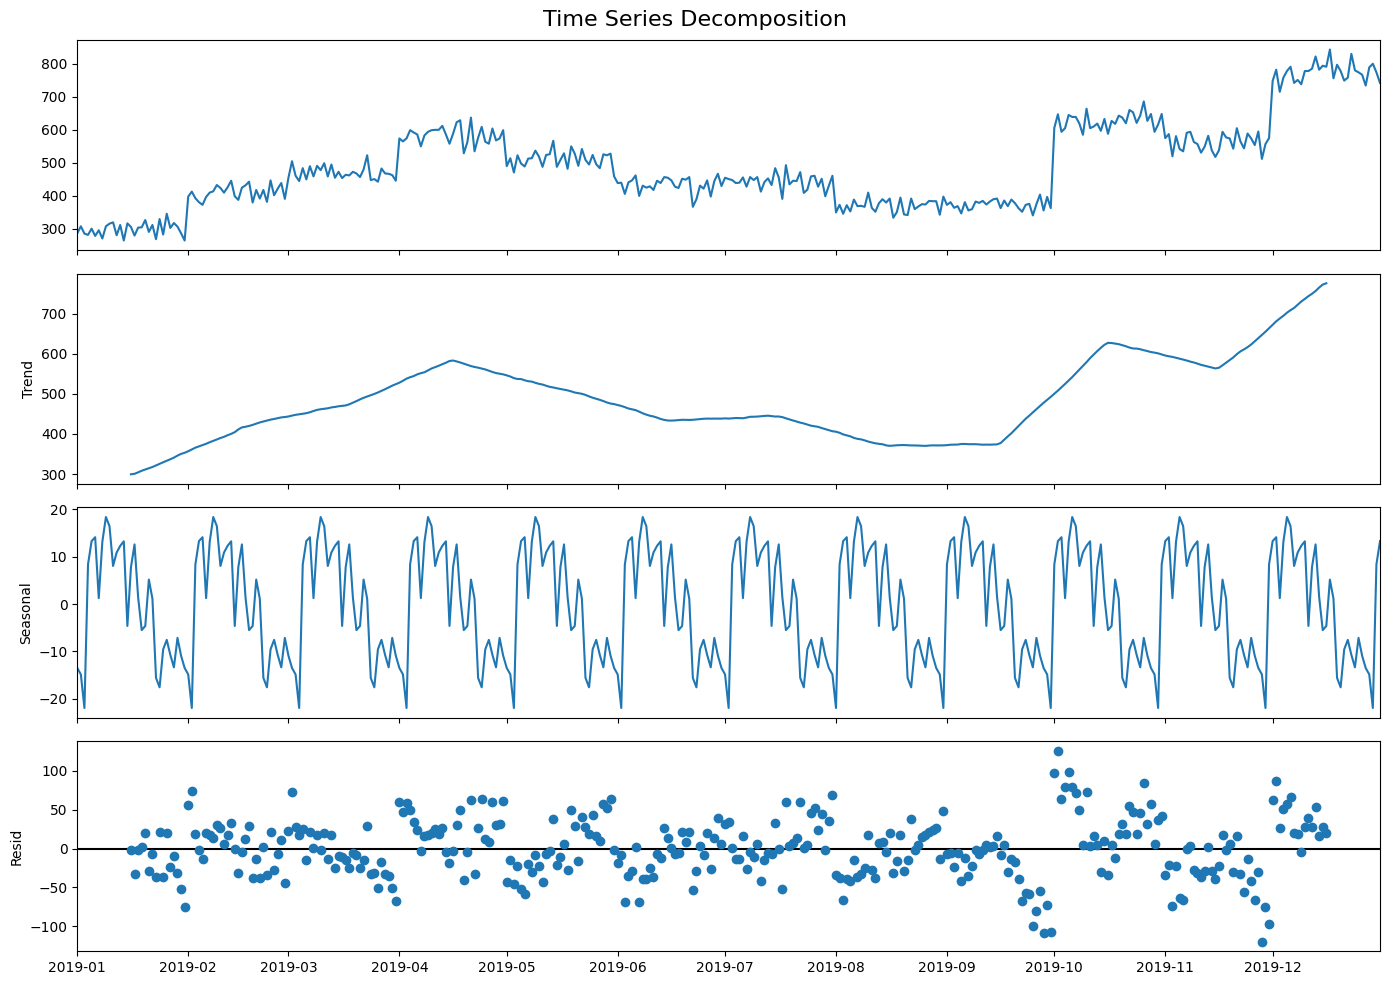

In [46]:
# Decomposition
decomposition = seasonal_decompose(df_daily, model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

## Stationarity Test (Augmented Dickey-Fuller Test - ADF))

In [47]:
# Uji Kestasioneran Menggunakan Augmented Dickey-Fuller Test
hasil_adf = adfuller(df_daily.dropna())

print("== Hasil Uji ADF ==")
print(f"Nilai Statistik ADF     : {hasil_adf[0]}")
print(f"p-value                 : {hasil_adf[1]}")
for tingkat, nilai_kritis in hasil_adf[4].items():
    print(f"Nilai Kritis ({tingkat}) : {nilai_kritis}")

# Interpretasi hasil uji
if hasil_adf[1] <= 0.05:
    print("Kesimpulan: Data bersifat stasioner (H0 ditolak)")
else:
    print("Kesimpulan: Data tidak stasioner (H0 gagal ditolak)")

== Hasil Uji ADF ==
Nilai Statistik ADF     : -1.1310849155859048
p-value                 : 0.7025177855652346
Nilai Kritis (1%) : -3.4485948978753314
Nilai Kritis (5%) : -2.86957971128312
Nilai Kritis (10%) : -2.571053050314224
Kesimpulan: Data tidak stasioner (H0 gagal ditolak)


## Plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)

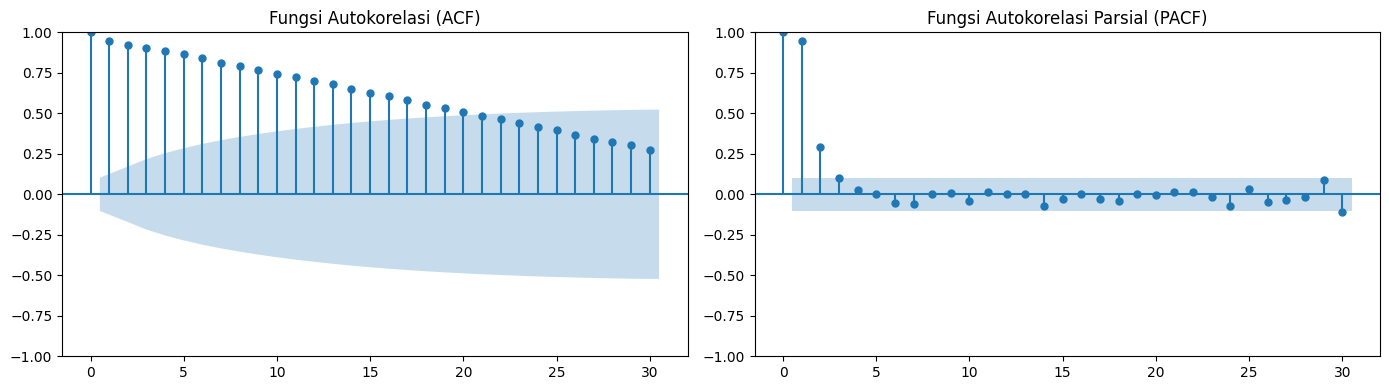

In [48]:
# Visualisasi ACF dan PACF untuk Identifikasi Pola Autokorelasi
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot Autocorrelation Function (ACF)
plot_acf(df_daily, lags=30, ax=axes[0])
axes[0].set_title('Fungsi Autokorelasi (ACF)')

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(df_daily, lags=30, ax=axes[1])
axes[1].set_title('Fungsi Autokorelasi Parsial (PACF)')

plt.tight_layout()
plt.show()

# Data Preparation

## Advanced Feature Engineering

In [49]:
# Ekstraksi Fitur Waktu & Kalender
def create_time_features_daily_power(df_input):
    df_output = df_input.copy()
    df_output['year'] = df_output.index.year
    df_output['month'] = df_output.index.month
    df_output['day'] = df_output.index.day # day of month
    df_output['dayofweek'] = df_output.index.dayofweek
    df_output['dayofyear'] = df_output.index.dayofyear
    df_output['weekofyear'] = df_output.index.isocalendar().week.astype(int)
    df_output['quarter'] = df_output.index.quarter
    df_output['is_weekend'] = (df_output.index.dayofweek >= 5).astype(int) # Sabtu=5, Minggu=6

    # Fitur siklik untuk seasonal
    df_output['dayofweek_sin'] = np.sin(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofweek_cos'] = np.cos(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofyear_sin'] = np.sin(2 * np.pi * df_output['dayofyear']/365)
    df_output['dayofyear_cos'] = np.cos(2 * np.pi * df_output['dayofyear']/365)
    df_output['month_sin'] = np.sin(2 * np.pi * df_output['month']/12)
    df_output['month_cos'] = np.cos(2 * np.pi * df_output['month']/12)
    return df_output

df_features = create_time_features_daily_power(df_daily) # gunakan df_daily yang sudah bersih


# Pembuatan Fitur Lag & Rolling Window dari 'total_orders'
def create_lag_rolling_features_orders(df_input):
    df_temp = df_input.copy()
    target_col = 'total_orders'

    # Lag features dari target
    df_temp[f'{target_col}_lag_1'] = df_temp[target_col].shift(1) # Kemarin
    df_temp[f'{target_col}_lag_7'] = df_temp[target_col].shift(7) # Seminggu lalu (seasonal mingguan)
    df_temp[f'{target_col}_lag_365'] = df_temp[target_col].shift(365) # Setahun lalu (seasonal tahunan)

    # Rolling window features dari target
    df_temp[f'{target_col}_rolling_mean_7'] = df_temp[target_col].rolling(window=7, min_periods=1).mean()
    df_temp[f'{target_col}_rolling_std_7'] = df_temp[target_col].rolling(window=7, min_periods=1).std()
    df_temp[f'{target_col}_rolling_mean_30'] = df_temp[target_col].rolling(window=30, min_periods=1).mean()

    return df_temp

df_features = create_lag_rolling_features_orders(df_features)


# Penanganan NaN dari Fitur
# Isi NaN yang tersisa setelah shift/rolling dengan rata-rata kolom
for col in df_features.columns:
    if df_features[col].isnull().any():
        df_features[col].fillna(df_features[col].mean(), inplace=True) # Mengisi dengan rata-rata kolom

print(f"Ukuran data setelah feature engineering: {df_features.shape[0]} baris")

Ukuran data setelah feature engineering: 365 baris


## Split the Data (Time-Based Splitting)

In [50]:
# Pemisahan Data Training, Validasi, & Testing menggunakan Rasio
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2 # Pastikan train_ratio + val_ratio + test_ratio = 1.0

total_days = len(df_features)
train_size = int(total_days * train_ratio)
val_size = int(total_days * val_ratio)
test_size = total_days - train_size - val_size # Mengambil sisa untuk memastikan totalnya pas

# Tentukan tanggal split berdasarkan jumlah hari (untuk informasi saja)
split_date_val = df_features.index[train_size - 1]
split_date_test = df_features.index[train_size + val_size - 1]

# Definisikan target
target_col = 'total_orders'

# Kolom-kolom yang akan digunakan sebagai fitur (selain target) untuk model ML
ml_features = [col for col in df_features.columns if col != target_col and '_adjusted' not in col] # Exclude adjusted target

# Split data untuk model Machine Learning
X_train_ml = df_features.iloc[:train_size][ml_features]
y_train_ml = df_features.iloc[:train_size][target_col]

X_val_ml = df_features.iloc[train_size:train_size + val_size][ml_features]
y_val_ml = df_features.iloc[train_size:train_size + val_size][target_col]

X_test_ml = df_features.iloc[train_size + val_size:][ml_features]
y_test_ml = df_features.iloc[train_size + val_size:][target_col]


# Data target untuk model Time Series Klasik (jika masih diperlukan, tapi dengan 3 set)
y_train_ts = df_daily[target_col].iloc[:train_size]
y_val_ts = df_daily[target_col].iloc[train_size:train_size + val_size]
y_test_ts = df_daily[target_col].iloc[train_size + val_size:]



print(f"Ukuran Data Training ML: {len(X_train_ml)} hari")
print(f"Ukuran Data Validation ML: {len(X_val_ml)} hari")
print(f"Ukuran Data Testing ML: {len(X_test_ml)} hari")
print(f"Ukuran Data Training TS: {len(y_train_ts)} hari")
print(f"Ukuran Data Validation TS: {len(y_val_ts)} hari")
print(f"Ukuran Data Testing TS: {len(y_test_ts)} hari")

Ukuran Data Training ML: 219 hari
Ukuran Data Validation ML: 73 hari
Ukuran Data Testing ML: 73 hari
Ukuran Data Training TS: 219 hari
Ukuran Data Validation TS: 73 hari
Ukuran Data Testing TS: 73 hari


# Modelling

## Fungsi untuk Evaluation Metrics & Visualisasi Model

In [51]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    # Memastikan prediksi tidak negatif (karena konsumsi daya tidak mungkin negatif)
    y_pred = np.maximum(0, y_pred) # Konsumsi tidak bisa negatif
    # Menghitung Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Menghitung Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    # Menghitung Mean Absolute Percentage Error (MAPE)
    # Menghindari pembagian dengan nol jika ada nilai aktual 0
    y_true_cleaned = y_true.copy()
    y_true_cleaned[y_true_cleaned == 0] = 1e-9 # Ganti 0 dengan small number untuk menghindari pembagian angka 0

    mape = np.mean(np.abs((y_true - y_pred) / y_true_cleaned)) * 100
    print(f"--- {model_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return rmse, mae, mape

# Fungsi untuk visualisasi perbandingan forecast vs. aktual (gabikin juga gapapa)
def plot_predictions(y_train, y_val, y_test, y_pred_val, y_pred_test, model_name):
    plt.figure(figsize=(15, 6))
    plt.plot(y_train.index, y_train, label='Data Historis (Train)', color='blue', alpha=0.7)

    if y_val is not None:
      plt.plot(y_val.index, y_val, label='Data Validasi (Aktual)', color='black', linewidth=2)
      if y_pred_val is not None:
        y_pred_val_series = pd.Series(y_pred_val, index=y_val.index)
        plt.plot(y_val.index, y_pred_val_series, label=f'Prediksi {model_name} (Validasi)', linestyle='--', color='red')


    if y_test is not None:
      plt.plot(y_test.index, y_test, label='Data Testing (Aktual)', color='green', linewidth=2)
      if y_pred_test is not None:
        y_pred_test_series = pd.Series(y_pred_test, index=y_test.index)
        plt.plot(y_test.index, y_pred_test_series, label=f'Prediksi {model_name} (Testing)', linestyle='--', color='orange')


    plt.title(f'Prediksi {model_name} vs. Aktual', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Power (kW)', fontsize=12)

    plt.axvline(x=y_train.index.max(), color='grey', linestyle=':', label='Akhir Data Historis')

    if y_val is not None and len(y_val) > 0:
      plt.axvline(x=y_val.index.max(), color='gray', linestyle='--', label='Akhir Data Validasi')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Exponential Smoothing (Holt-Winters)

Evaluasi pada Data Validasi:
MAE  : 122.79
RMSE : 180.99
MAPE : 23.26%

Evaluasi pada Data Testing:
MAE  : 76.77
RMSE : 85.88
MAPE : 12.08%


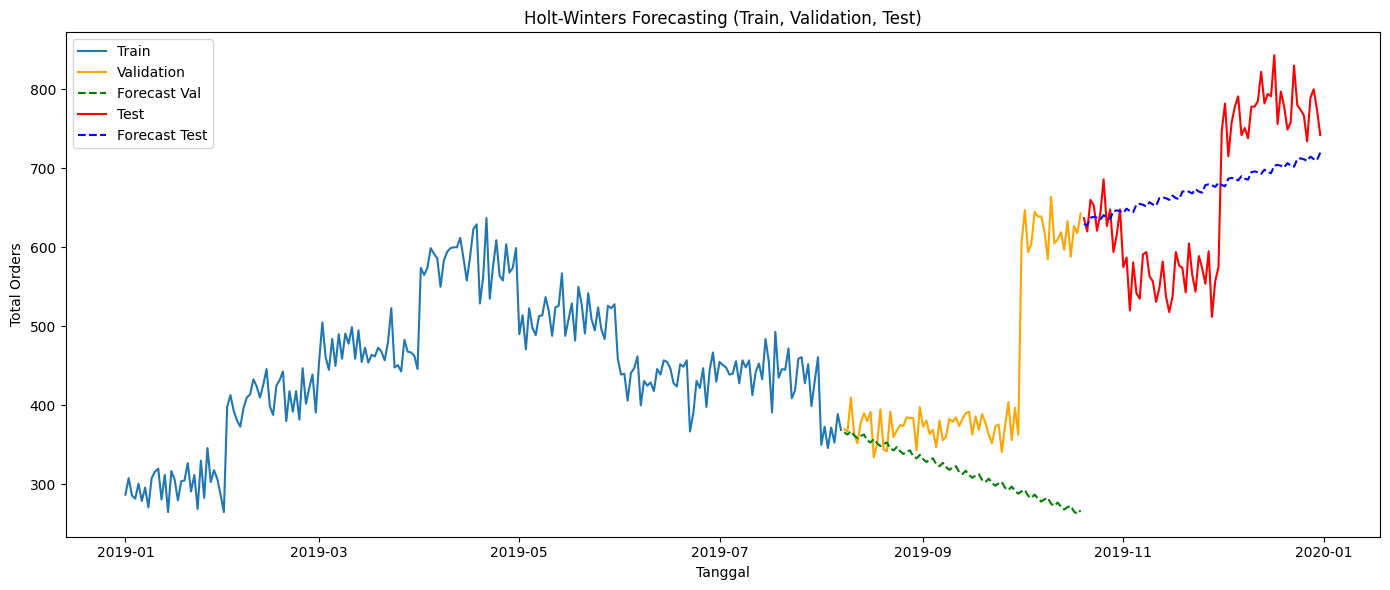

In [58]:
model = ExponentialSmoothing(
    y_train_ts,
    trend='add',
    seasonal='add',
    seasonal_periods=7  # diasumsikan musiman mingguan
).fit()

# 2. Forecast
forecast_val = model.forecast(len(y_val_ts))

# 3. Evaluasi Validation
mae_val = mean_absolute_error(y_val_ts, forecast_val)
rmse_val = np.sqrt(mean_squared_error(y_val_ts, forecast_val))
mape_val = np.mean(np.abs((y_val_ts - forecast_val) / y_val_ts)) * 100

print("Evaluasi pada Data Validasi:")
print(f"MAE  : {mae_val:.2f}")
print(f"RMSE : {rmse_val:.2f}")
print(f"MAPE : {mape_val:.2f}%")

# 4. Re-train model menggunakan train + validation untuk evaluasi test
y_trainval_ts = pd.concat([y_train_ts, y_val_ts])
model_full = ExponentialSmoothing(
    y_trainval_ts,
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit()

# 5. Forecast sepanjang test set
forecast_test = model_full.forecast(len(y_test_ts))

# 6. Evaluasi Testing
mae_test = mean_absolute_error(y_test_ts, forecast_test)
rmse_test = np.sqrt(mean_squared_error(y_test_ts, forecast_test))
mape_test = np.mean(np.abs((y_test_ts - forecast_test) / y_test_ts)) * 100

print("\nEvaluasi pada Data Testing:")
print(f"MAE  : {mae_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"MAPE : {mape_test:.2f}%")

# 7. Visualisasi lengkap
plt.figure(figsize=(14, 6))
plt.plot(y_train_ts.index, y_train_ts, label='Train')
plt.plot(y_val_ts.index, y_val_ts, label='Validation', color='orange')
plt.plot(y_val_ts.index, forecast_val, label='Forecast Val', color='green', linestyle='--')
plt.plot(y_test_ts.index, y_test_ts, label='Test', color='red')
plt.plot(y_test_ts.index, forecast_test, label='Forecast Test', color='blue', linestyle='--')
plt.title('Holt-Winters Forecasting (Train, Validation, Test)')
plt.xlabel('Tanggal')
plt.ylabel('Total Orders')
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest



Evaluasi pada Data Validasi:
MAE  : 36.12
RMSE : 56.54
MAPE : 7.18%

Evaluasi pada Data Testing:
MAE  : 131.58
RMSE : 164.23
MAPE : 18.01%


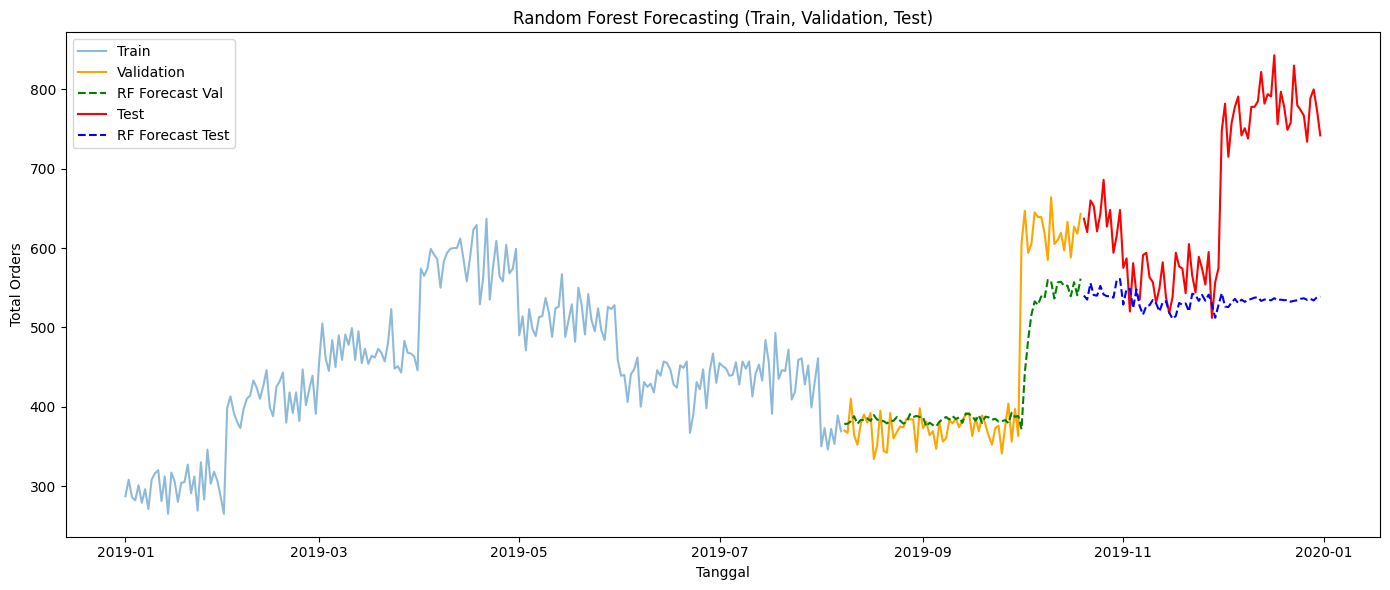

In [62]:
# 1. Inisialisasi dan training model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_ml, y_train_ml)

# 2. Prediksi
pred_val = rf_model.predict(X_val_ml)
pred_test = rf_model.predict(X_test_ml)

# 3. Evaluasi validasi
mae_val = mean_absolute_error(y_val_ml, pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val_ml, pred_val))
mape_val = np.mean(np.abs((y_val_ml - pred_val) / y_val_ml)) * 100

print("Evaluasi pada Data Validasi:")
print(f"MAE  : {mae_val:.2f}")
print(f"RMSE : {rmse_val:.2f}")
print(f"MAPE : {mape_val:.2f}%")

# 4. Evaluasi testing
mae_test = mean_absolute_error(y_test_ml, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test_ml, pred_test))
mape_test = np.mean(np.abs((y_test_ml - pred_test) / y_test_ml)) * 100

print("\nEvaluasi pada Data Testing:")
print(f"MAE  : {mae_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"MAPE : {mape_test:.2f}%")

# 5. Visualisasi hasil
plt.figure(figsize=(14, 6))
plt.plot(y_train_ml.index, y_train_ml, label='Train', alpha=0.5)
plt.plot(y_val_ml.index, y_val_ml, label='Validation', color='orange')
plt.plot(y_val_ml.index, pred_val, label='RF Forecast Val', color='green', linestyle='--')
plt.plot(y_test_ml.index, y_test_ml, label='Test', color='red')
plt.plot(y_test_ml.index, pred_test, label='RF Forecast Test', color='blue', linestyle='--')
plt.title('Random Forest Forecasting (Train, Validation, Test)')
plt.xlabel('Tanggal')
plt.ylabel('Total Orders')
plt.legend()
plt.tight_layout()
plt.show()

## Re-train best model lalu prediksi pada data test

Evaluasi Model Holt-Winters (Train + Validation → Test):
1. MAE  : 76.77
2. RMSE : 85.88
3. MAPE : 12.08%


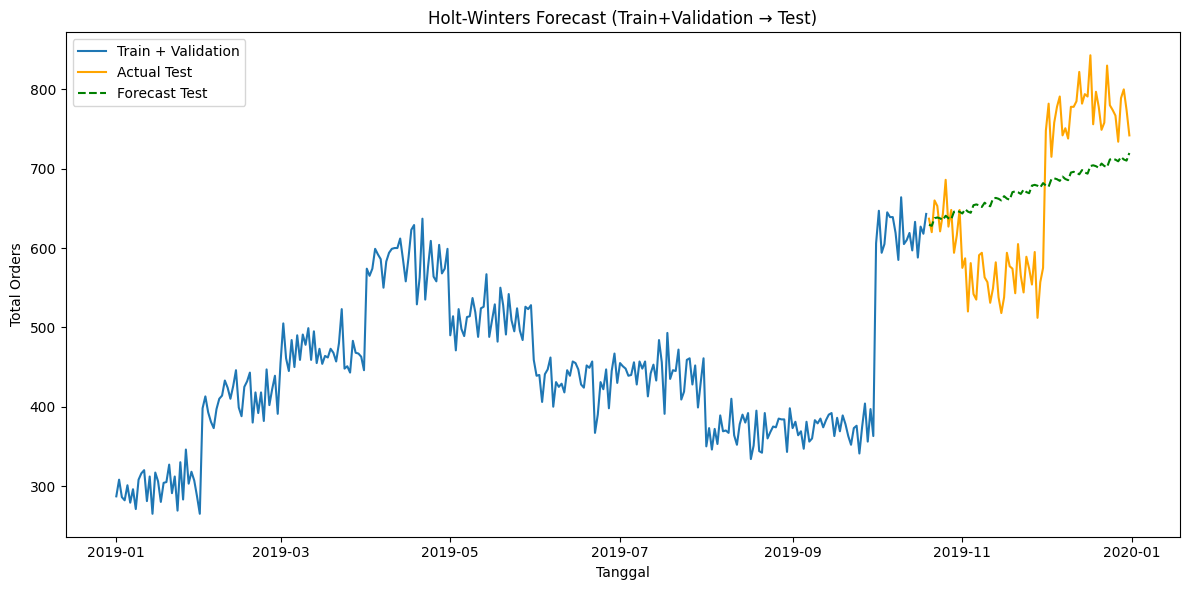

In [66]:
y_trainval_ts = pd.concat([y_train_ts, y_val_ts])

# 2. Latih ulang model Holt-Winters pada data train + validation
model_final = ExponentialSmoothing(
    y_trainval_ts,
    trend='add',
    seasonal='add',
    seasonal_periods=7  # asumsi musiman mingguan
).fit()

# 3. Forecast sepanjang periode test
forecast_test = model_final.forecast(len(y_test_ts))

# 4. Evaluasi performa model pada data TEST
mae = mean_absolute_error(y_test_ts, forecast_test)
rmse = np.sqrt(mean_squared_error(y_test_ts, forecast_test))
mape = np.mean(np.abs((y_test_ts - forecast_test) / y_test_ts)) * 100

print("Evaluasi Model Holt-Winters (Train + Validation → Test):")
print(f"1. MAE  : {mae:.2f}")
print(f"2. RMSE : {rmse:.2f}")
print(f"3. MAPE : {mape:.2f}%")

# 5. Visualisasi hasil forecast vs data aktual
plt.figure(figsize=(12, 6))
plt.plot(y_trainval_ts.index, y_trainval_ts, label='Train + Validation')
plt.plot(y_test_ts.index, y_test_ts, label='Actual Test', color='orange')
plt.plot(y_test_ts.index, forecast_test, label='Forecast Test', color='green', linestyle='--')
plt.title('Holt-Winters Forecast (Train+Validation → Test)')
plt.xlabel('Tanggal')
plt.ylabel('Total Orders')
plt.legend()
plt.tight_layout()
plt.show()